In [1]:
# IMPORT PANDAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# READ THE CSV FILE
df = pd.read_csv("WHO-COVID-19-global-data.csv") # READ THE DATASET
df = pd.DataFrame(df)

In [16]:
# WORKING ON KUWAIT
df_countries = df.groupby(df["Country"])

#KUWAIT
df_kwt = df_countries.get_group("Kuwait")
df_kwt = df_kwt.reset_index(drop = True)
df_kwt = df_kwt['Cumulative_cases']
df_kwt = pd.DataFrame(df_kwt)

In [17]:
#NORMALIZATION

pop_k = 4271000

df_kwt["Cumulative_cases_norm"] = df_kwt["Cumulative_cases"]/pop_k

In [18]:
kt = df_kwt

In [19]:
i = 0
while i < 97:
    kt = kt.drop(kt.index[0])
    i = i + 1

kt = kt.reset_index(drop = True)

In [20]:
kt["Cumulative_cases_norm"] = kt["Cumulative_cases"]/pop_k

kt["log"] = np.log(kt["Cumulative_cases_norm"])

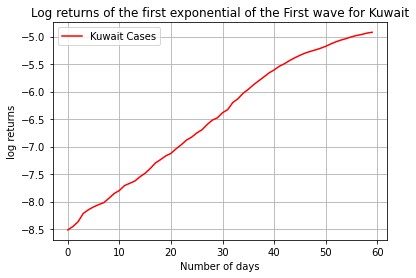

In [22]:
kt['log'][:60].plot(grid = True, label = 'Kuwait Cases', color = 'red')
plt.legend()
plt.title("Log returns of the first exponential of the First wave for Kuwait")
plt.ylabel("log returns")
plt.xlabel("Number of days")
plt.show()

# KUWAIT

**log P = c + rt -------------------1**

The First wave of Kuwait is 0-250 (in days). Each wave will have an exponential growth and logistic growth. The exponential growth is the high point of the wave where the cases are rising exponentially and rapidly. The logistic is the end part of the wave, where the cases are seemingly slowed down and it means the end of the first wave altogether. There may be multiple exponential and logistics growths within a wave.

Now from the graphs above, we know that

c = -8.52118

t = 250 (duration of the first wave)

log(P) = -3.37292 (from the log return graph at t = 250)

From 1,

-3.37292 = -8.52118 + 250.r

r = (-3.37292 + 8.52118)/250

r = 0.020593

In [9]:
r = 0.020593
from scipy.integrate import odeint

# Total population, n
n = pop_k
# Initial number of infected and recovered individuals, i_0 and r_0
i_0 = kt["Cumulative_cases_norm"][0]
r_0 = 0

# beginning of the period s_0
s_0 = 1 - i_0 - r_0

In [10]:
# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b

In [13]:
t = np.linspace(0, 250, 250)
# The SIR model differential equations.
def deriv(y, t, a, b):
    S, I, R = y
    dSdt = - a * S * I
    dIdt = a * (S * I) - (b * I)
    dRdt = b * I
    return dSdt, dIdt, dRdt

y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

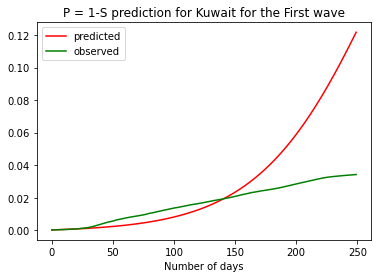

In [15]:
s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"][:250].plot(c = 'red', label = 'predicted')
kt['Cumulative_cases_norm'][:250].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Kuwait for the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()